# Maxwell-Boltzmann Distribution

Here we need to sample the Maxwell-Distribution which gives the equalibrium speed distribution:

$P_\text{Maxwell-Boltzmann} = \left( \frac{2}{\pi} \right)^{1/2} \left( \frac{2}{v^2_\text{peak}} \right)^{3/2} v^2 \exp{\left( - \frac{v^2}{v^2_\text{peak}} \right)}$ </br>
$ v_\text{peak} = \left( \frac{2kT}{m} \right)^{1/2} $

Lets begin by importing the standard python libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### For each atom mass we have a new Maxwell-Boltzmann Distribution

In [3]:
v_peak   = 1
counts   = 10

domain  = np.linspace(0., 5*v_peak, 100)                                 ### Speed values
samples = counts                                                      ### Number of Atoms of a certain Mass type
PDF     = (2/np.pi)**(0.5) * (2/v_peak**2)**(1.5) * domain**2 * np.exp( - domain**2 / v_peak**2  )  ### Maxwell-Boltzmann PDF for given: Mass & Temperature
PDF    *= 1/(np.sum(PDF))                                                                           ### Normalize to 1 for the specified range
speeds  = np.random.choice(domain, samples, p=PDF)

### First we get unquie masses array

#### We use np.unique( ), to sample an arbtiary discreted Probability Distribution/Density Function (PDF). In this case the PDF is the Maxwell-Boltzmann function given above for speed $v$

unique_masses: gives an array of unique masses </br>
indices:       gives the index of original array, such that unique_masses[indices] = is the original array. </br>
counts:        gives the count for each of the unique masses.

In [4]:
mass = np.array([1582, 1582, 21511, 18654, 1582, 21511, 1582])
unique_masses, indices, counts = np.unique(mass, return_inverse=True, return_counts=True)

In [5]:
Temperature = 10
unique_masses, counts = np.unique(mass, return_counts=True)

In [6]:
speed_i = np.zeros(len(mass))
for i, masstype in enumerate(unique_masses):
    v_peak = np.sqrt( 2*Temperature / masstype )

    domain  = np.linspace(0., 5.*v_peak, 100)                                                           ### Speed values                                            
    PDF     = (2/np.pi)**(0.5) * (2/v_peak**2)**(1.5) * domain**2 * np.exp( - domain**2 / v_peak**2  )  ### Maxwell-Boltzmann PDF for given: Mass & Temperature
    PDF    *= 1/(np.sum(PDF))                                                                           ### Normalize to 1 for the specified range
    
    speeds     = np.random.choice(domain, counts[i], p=PDF)                                             ### counts[i] = Number of Atoms of a certain Mass type i
    j          = np.where(indices == i)[0]
    speed_i[j] = speeds

In [7]:
speed_i

array([0.11925205, 0.10221605, 0.02309994, 0.06284163, 0.15332407,
       0.02001994, 0.04542935])

Lets now package this idea into a function. While introducing a random sample of two angular directions.

In [8]:
def MaxwellBoltzmann(Mass, Temperature):
    """ Get Maxwell-Boltzmann 3D velocities given: Mass (1D np.array) and Temperature (np.float) """
    
    unique_masses, indices, counts = np.unique(mass, return_inverse=True, return_counts=True)
    
    θ = np.random.random_sample(len(Mass))*(np.pi)
    φ = np.random.random_sample(len(Mass))*(2.*np.pi)

    if Temperature == 0:
        return np.zeros((len(Mass),3))
    
    else:
        speed_i = np.zeros(len(Mass))
        for i, masstype in enumerate(unique_masses):
            v_peak = np.sqrt( 2*Temperature / masstype )

            domain  = np.linspace(0., 5.*v_peak, 100)                                                           ### Speed values                                            
            PDF     = (2/np.pi)**(0.5) * (2/v_peak**2)**(1.5) * domain**2 * np.exp( - domain**2 / v_peak**2  )  ### Maxwell-Boltzmann PDF for given: Mass & Temperature
            PDF    *= 1/(np.sum(PDF))                                                                           ### Normalize to 1 for the specified range

            speeds     = np.random.choice(domain, counts[i], p=PDF)                                             ### counts[i] = Number of Atoms of a certain Mass type i
            j          = np.where(indices == i)[0]
            speed_i[j] = speeds

        vx = speed_i*np.sin(θ)*np.cos(φ)
        vy = speed_i*np.sin(θ)*np.sin(φ)
        vz = speed_i*np.cos(θ)
            
        return np.asarray([vx, vy, vz]).T

In [9]:
mass = np.array([1582, 1582, 21511, 18654, 1582, 21511, 1582])
MaxwellBoltzmann(mass, 1.)

array([[-0.01399897, -0.01354567,  0.00327658],
       [-0.03668971,  0.0382802 ,  0.04003928],
       [-0.006843  , -0.00719169,  0.00785954],
       [ 0.00265635, -0.00314098, -0.00322896],
       [ 0.00587917, -0.04733404,  0.01590946],
       [-0.00391075,  0.00668152, -0.00088086],
       [-0.04218093, -0.01495712, -0.026628  ]])

### Now if all masses are the same, we have...

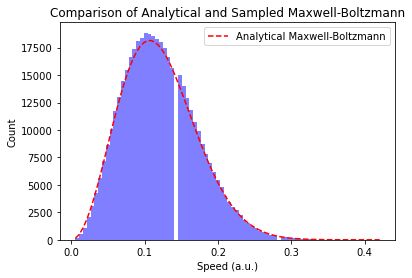

In [14]:
number_of_atoms = 450020
Temp            = 10
M               = 1755

mass = M*np.ones(number_of_atoms)
x = np.sqrt(np.einsum("ix -> i", MaxwellBoltzmann(mass, Temp)**2 ))

num_bins = 80
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5) #, density=True, stacked=True)

v_peak = np.sqrt( 2*Temp / mass[0] )
PDF     = (2/np.pi)**(0.5) * (2/v_peak**2)**(1.5) * bins**2 * np.exp( - bins**2 / v_peak**2  )  ### Maxwell-Boltzmann PDF for given: Mass & Temperature
PDF    *= 1/(np.sum(PDF))
PDF    *= number_of_atoms


plt.plot(bins, PDF, 'r--', label="Analytical Maxwell-Boltzmann")
plt.title("Comparison of Analytical and Sampled Maxwell-Boltzmann")
plt.xlabel("Speed (a.u.)")
plt.ylabel("Count")
plt.legend()
plt.show()